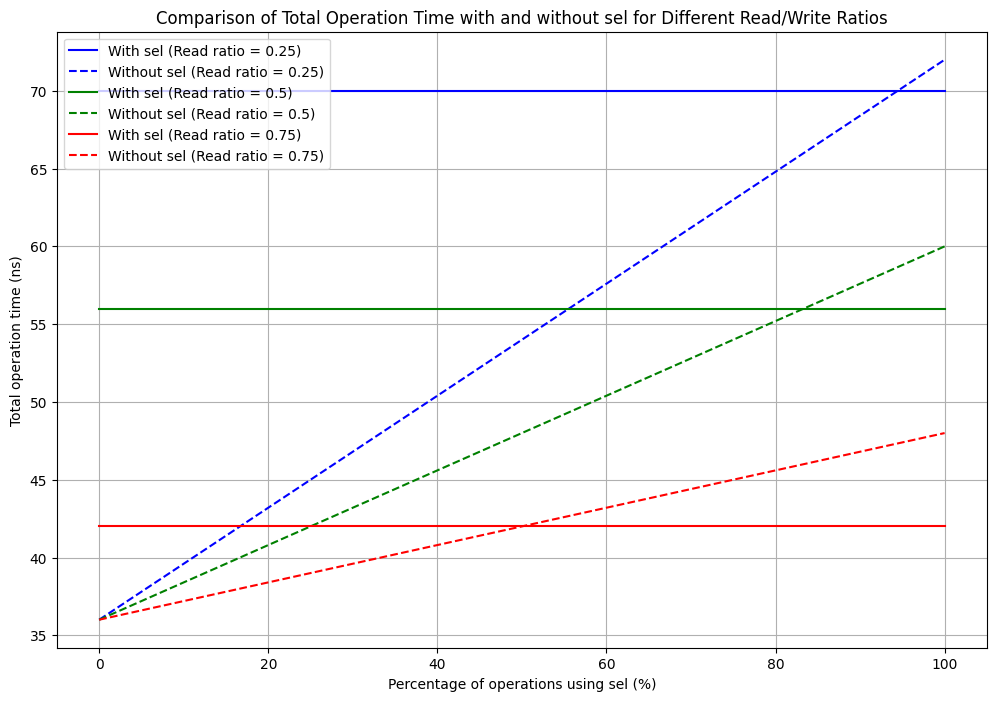

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 定义操作时间
read_time_without_sel = 12 * 3   # 没有 sel 时一次读操作的时间
write_time_without_sel = 12 * 3  # 没有 sel 时一次写操作的时间
sel_equiv_time = read_time_without_sel + write_time_without_sel + 12  # sel 功能的等效时间
read_time_with_sel = 14 * 2      # 有 sel 时一次读操作的时间
write_time_with_sel = 14 * 6     # 有 sel 时一次写操作的时间

# 定义 sel 操作占总操作的百分比
percent_sel_operations = np.linspace(0, 100, 100)

# 定义读写占比
read_ratios = [0.25, 0.5, 0.75]

# 定义颜色和线型
colors = ['b', 'g', 'r']
line_styles = ['-', '--', ':']

# 绘制图表
plt.figure(figsize=(12, 8))

line_styles = ['-', '--', ':']  # 定义不同的线型

for i, read_ratio in enumerate(read_ratios):
    # 计算有 sel 功能和没有 sel 功能的总操作时间
    total_time_with_sel = (percent_sel_operations * (read_ratio * read_time_with_sel + (1 - read_ratio) * write_time_with_sel) / 100 +
                           (100 - percent_sel_operations) * (read_ratio * read_time_with_sel + (1 - read_ratio) * write_time_with_sel) / 100)
    
    total_time_without_sel = (percent_sel_operations * (read_ratio * (read_time_without_sel) + (1 - read_ratio) * sel_equiv_time) / 100 +
                              (100 - percent_sel_operations) * (read_ratio * read_time_without_sel + (1 - read_ratio) * write_time_without_sel) / 100)
    
    # 绘制图表
    plt.plot(percent_sel_operations, total_time_with_sel, color=colors[i], linestyle=line_styles[0], label=f'With sel (Read ratio = {read_ratio})')
    plt.plot(percent_sel_operations, total_time_without_sel, color=colors[i], linestyle=line_styles[1], label=f'Without sel (Read ratio = {read_ratio})')

plt.xlabel('Percentage of operations using sel (%)')
plt.ylabel('Total operation time (ns)')
plt.title('Comparison of Total Operation Time with and without sel for Different Read/Write Ratios')
plt.legend()
plt.grid(True)
plt.show()